In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
O3_all = pd.read_csv("../Data/real_events_O3_ALL.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [15]:
print(len(O3_all))

55


In [3]:
keep = ["chirp_mass", "combined_far", "mass1", "mass2", "snr", "spin1z", "spin2z", "coalescence_phase", "template_duration"]
O3_all_reduced = O3_all[keep]
O4_all_reduced = O4_all[keep]
# Removed : none

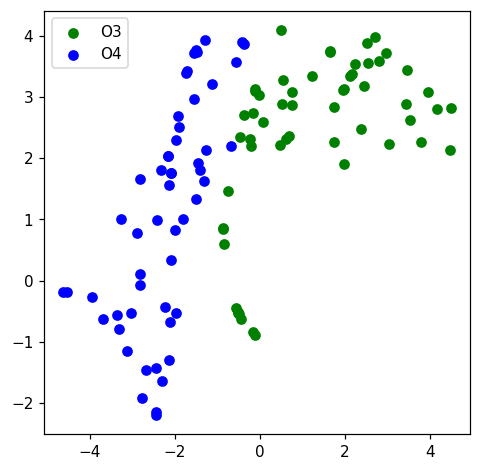

In [4]:
# Creating the TSNE algorithm :
tsne_O3 = TSNE(n_components=2, random_state=42)

# The random_state argument is a seed for the random number generator (?)
# Setting random_state to a fixed value allows for reproducability (?)

# Applying the O3 data to the TSNE algorithm created : 
X_tsne_O3 = tsne_O3.fit_transform(O3_all_reduced)

# This creates a 2 - dimensional df that will later be used for plotting

tsne_O4 = TSNE(n_components=2, random_state=42)
X_tsne_O4 = tsne_O4.fit_transform(O4_all_reduced)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

scatter_O3 = ax.scatter(X_tsne_O3[:, 0], X_tsne_O3[:, 1],color = "green", label="O3")

scatter_O4 = ax.scatter(X_tsne_O4[:, 0], X_tsne_O4[:, 1], color = "blue",label="O4")


ax.legend()
plt.show()

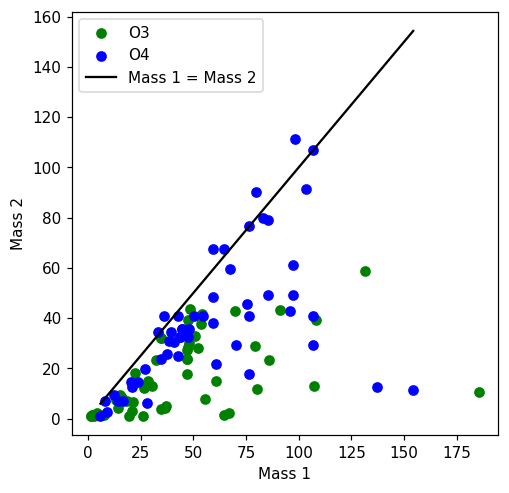

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.scatter(O3_all["mass1"], O3_all["mass2"], color = "green", label = "O3")
ax.scatter(O4_all["mass1"], O4_all["mass2"], color = "blue", label = "O4")
ax.set_xlabel("Mass 1")
ax.set_ylabel("Mass 2")
x = np.linspace(min(O4_all["mass1"]), max(O4_all["mass1"]), 100)
plt.plot(x, x, color = "black", label = "Mass 1 = Mass 2")
ax.legend()

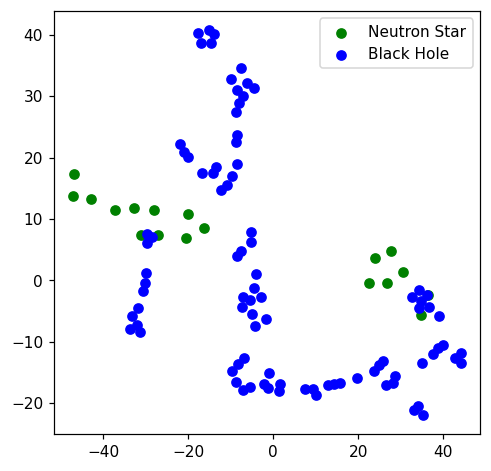

In [8]:
NeutronStar = pd.DataFrame(pd.concat([o3_NeutronStar , o4_NeutronStar], ignore_index = True))
BlackHole = pd.DataFrame(pd.concat([o3_BlackHole , o4_BlackHole], ignore_index = True))

NeutronStar_TSNE = (TSNE(perplexity = 5,n_components=2, random_state=42)).fit_transform(NeutronStar)
BlackHole_TSNE = (TSNE(perplexity = 5,n_components=2, random_state=42)).fit_transform(BlackHole)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

scatter_Neutron = ax.scatter(NeutronStar_TSNE[:, 0], NeutronStar_TSNE[:, 1],color = "green", label="Neutron Star")
scatter_BlackHole = ax.scatter(BlackHole_TSNE[:, 0], BlackHole_TSNE[:, 1],color = "Blue", label="Black Hole")

ax.legend()

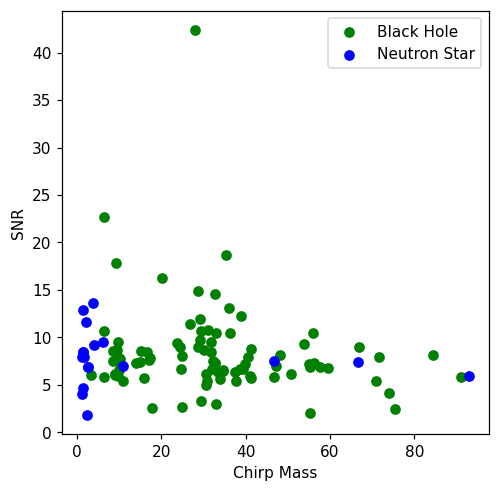

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.scatter(BlackHole[x_val], BlackHole[y_val], color = "green", label = "Black Hole")
ax.scatter(NeutronStar[x_val], NeutronStar[y_val], color = "blue", label = "Neutron Star")

ax.set_xlabel("Chirp Mass")
ax.set_ylabel("SNR")
ax.legend()

Text(0.5, 1.0, 'Chirp masses for BNS & BBH in O3 and O4')

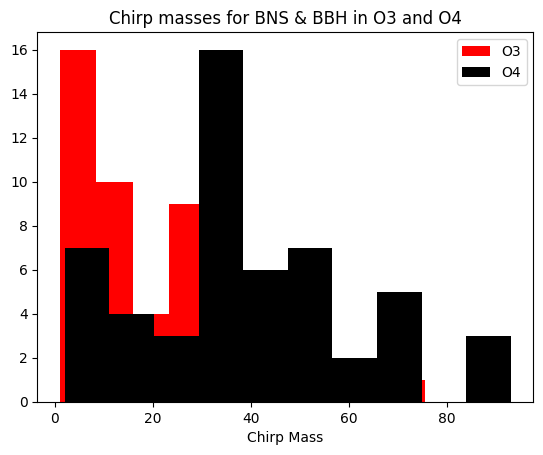

In [34]:
plt.hist(O3_all["chirp_mass"], color = "red", label  = "O3")
plt.hist(O4_all["chirp_mass"], color = "black", label  = "O4")
plt.xlabel("Chirp Mass")
plt.legend()
plt.title("Chirp masses for BNS & BBH in O3 and O4")

Text(0.5, 1.0, 'SNR for BNS & BBH in O3 and O4')

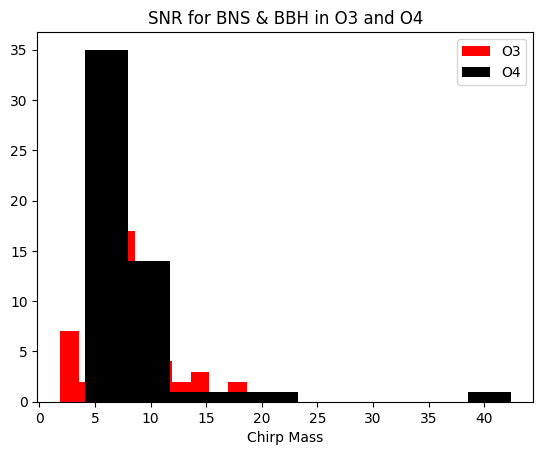

In [35]:
plt.hist(O3_all["snr"], color = "red", label  = "O3")
plt.hist(O4_all["snr"], color = "black", label  = "O4")
plt.xlabel("Chirp Mass")
plt.legend()
plt.title("SNR for BNS & BBH in O3 and O4")

Note: Methods such as Sturges' Rule, Square Root Rule, Scott's Rule, and more can be used to optimize the binning of these histograms (the current plots obviosuly aren't optimal)

Square Root Rule: 

$$\# = \sqrt{n}$$
 where $\#$ is the number of bins and $n$ is the number of data points. 

Sturges' Rule: 
$$\# = 1 + \log_{2}(n)$$

(First try using these. Should work well)

$$d_L = 45 \text{ Gpc} \left( \frac{\text{Hz}}{f_{\text{GW}\mid_{\text{max}}}}\right)\left( \frac{10^{-21}}{h\mid_{\text{max}}}\right)$$

Above is the formula for luminosity distance given in https://arxiv.org/pdf/1608.01940.pdf (equation 22). We can get the max frequency but I don't know how we'd find the maximum strain. Would we have to take it off a plot? It doesn't seem to be given in the GraceDB data.

$$\chi_{\text{eff}} = \frac{\vec{S_1}/m_1+\vec{S_2}/m_2}{m_1+m_2} \cdot \hat{L}$$

In [10]:
# Example of how this would be coded (for each row in a dataframe)... would need to update this... still dependent on previous code
def x_eff(dataframe):
    for x in range(len(dataframe)):
        x_eff_vals = ((dataframe.at[x, "spin1z"] / dataframe.at[x, "mass1"]) + (dataframe.at[x, "spin2z"] / dataframe.at[x, "mass2"])) / ((dataframe.at[x, "mass1"]) + (dataframe.at[x, "mass2"]))
        dataframe.at[x, 'x_eff'] = x_eff_vals

### Separating O3 and O4 data into neutron star and black hole mergers (this is just a rough estimate at this point)

In [17]:
O3_NS = (O3_all[O3_all["template_duration"] >= 30])
O3_BH = (O3_all[O3_all["template_duration"] < 30])

O4_NS = (O4_all[O4_all["template_duration"] >= 30])
O4_BH = (O4_all[O4_all["template_duration"] < 30])

Text(0.5, 1.0, 'Neutron Star Events')

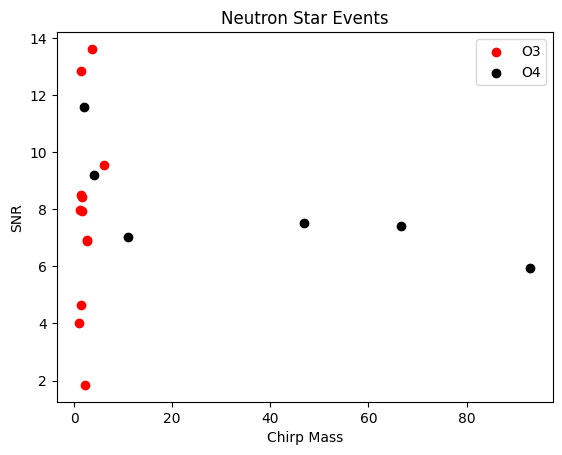

In [28]:
plt.scatter(O3_NS["chirp_mass"], O3_NS["snr"], color = "red", label= "O3")
plt.scatter(O4_NS["chirp_mass"], O4_NS["snr"], color = "black", label = "O4")
plt.xlabel("Chirp Mass")
plt.ylabel("SNR")
plt.legend()
plt.title("Neutron Star Events")

Text(0.5, 1.0, 'Black Hole Events')

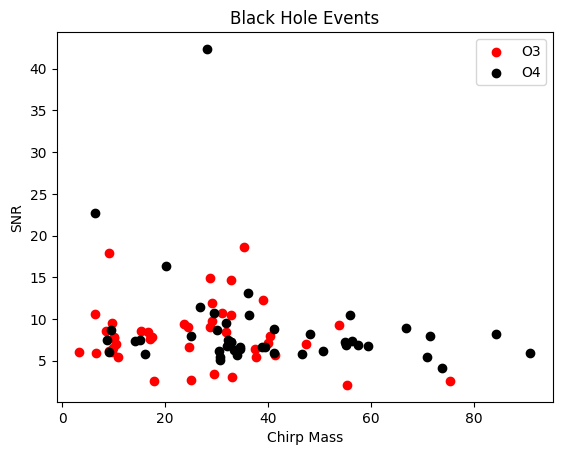

In [29]:
plt.scatter(O3_BH["chirp_mass"], O3_BH["snr"], color = "red", label= "O3")
plt.scatter(O4_BH["chirp_mass"], O4_BH["snr"], color = "black", label = "O4")
plt.xlabel("Chirp Mass")
plt.ylabel("SNR")
plt.legend()
plt.title("Black Hole Events")

CPU times: user 165 ms, sys: 3.23 ms, total: 168 ms
Wall time: 89.5 ms
CPU times: user 191 ms, sys: 1.15 ms, total: 192 ms
Wall time: 97 ms
CPU times: user 173 ms, sys: 1.51 ms, total: 174 ms
Wall time: 88.6 ms
CPU times: user 295 ms, sys: 3.67 ms, total: 298 ms
Wall time: 168 ms


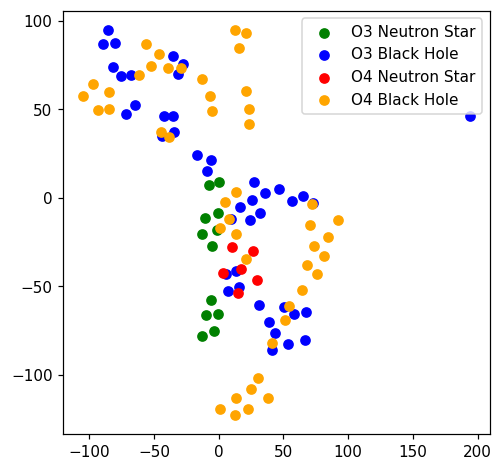

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

tsne_O3 = TSNE(perplexity = 5,n_components=2, random_state=42, early_exaggeration = 25)

# Will later used O3_all_reduced ... should just be kept as all O3 data for now.
#o3_NeutronStar = (O3_all_reduced[O3_all_reduced["template_duration"] >= 30])
#o3_BlackHole = (O3_all_reduced[O3_all_reduced["template_duration"] < 30])
%time X_tsne_O3_NeutronStar = tsne_O3.fit_transform(o3_NeutronStar)
%time X_tsne_O3_BlackHole = tsne_O3.fit_transform(o3_BlackHole)

tsne_O4 = TSNE(perplexity = 5,n_components=2, random_state=42, early_exaggeration = 25)
#o4_NeutronStar = (O4_all_reduced[O4_all_reduced["template_duration"] >= 30])
#o4_BlackHole = (O4_all_reduced[O4_all_reduced["template_duration"] < 30])
%time X_tsne_O4_NeutroStar = tsne_O4.fit_transform(o4_NeutronStar)
%time X_tsne_O4_BlackHole = tsne_O4.fit_transform(o4_BlackHole)

scatter_O3 = ax.scatter(X_tsne_O3_NeutronStar[:, 0], X_tsne_O3_NeutronStar[:, 1],color = "green", label="O3 Neutron Star")
scatter_O3 = ax.scatter(X_tsne_O3_BlackHole[:, 0], X_tsne_O3_BlackHole[:, 1],color = "blue", label="O3 Black Hole")

scatter_O4 = ax.scatter(X_tsne_O4_NeutroStar[:, 0], X_tsne_O4_NeutroStar[:, 1], color = "red",label="O4 Neutron Star")
scatter_O4 = ax.scatter(X_tsne_O4_BlackHole[:, 0], X_tsne_O4_BlackHole[:, 1], color = "orange",label="O4 Black Hole")


ax.legend()
plt.show()

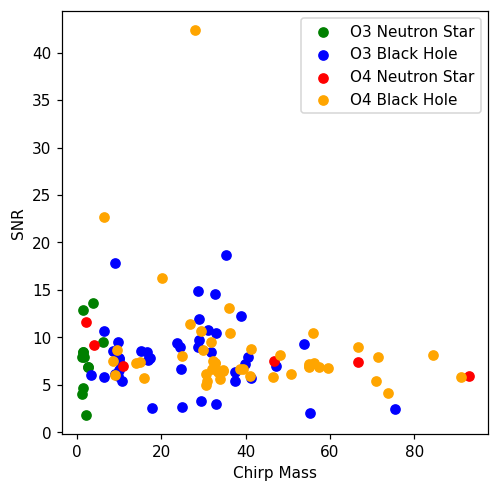

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
# ax.scatter(o3_NeutronStar["mass1"] + o3_NeutronStar["mass2"],o3_NeutronStar['snr'], color = "green", label = "O3 Neutron Star")
# ax.scatter(o3_BlackHole["mass1"] + o3_BlackHole["mass2"], o3_BlackHole['snr'], color = "blue", label = "O3 Black Hole")
# ax.scatter(o4_NeutronStar["mass1"] + o4_NeutronStar["mass2"], o4_NeutronStar['snr'], color = "red", label = "O4 Neutron Star")
# ax.scatter(o4_BlackHole["mass1"] + o4_BlackHole["mass2"], o4_BlackHole['snr'], color = "orange", label = "O4 Black Hole")
x_val = "chirp_mass"
y_val = "snr"

ax.scatter(o3_NeutronStar[x_val],o3_NeutronStar[y_val], color = "green", label = "O3 Neutron Star")
ax.scatter(o3_BlackHole[x_val], o3_BlackHole[y_val], color = "blue", label = "O3 Black Hole")
ax.scatter(o4_NeutronStar[x_val], o4_NeutronStar[y_val], color = "red", label = "O4 Neutron Star")
ax.scatter(o4_BlackHole[x_val], o4_BlackHole[y_val], color = "orange", label = "O4 Black Hole") 

################
# samples = [o3_NeutronStar,o3_BlackHole,o4_NeutronStar,o4_BlackHole]
# for sample in samples:
#     KM = KMeans(n_clusters=1)
#     KM.fit(sample[x_val])
#     centroids = KM.cluster_centers_

#     for ind,i in enumerate(centroids):
#         class_inds=np.where(KM.labels_==ind)[0]
#         max_dist=np.max(metrics.pairwise_distances(i, sample[class_inds]))
#         print(max_dist)
#         plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))
#     plt.show()
################

#ax.set_xlabel("Mass 1 + Mass 2")
ax.set_xlabel("Chirp Mass")
ax.set_ylabel("SNR")
ax.legend()